# Eind opdracht Data Learning
# Amsterdam Airbnb - Nick Hurkmans

# 1 - De Data

Voor de opdracht Data Learing ga ik aan de slag met de data van Airbnb, specifiek de data van airbnb's uit de Nederlandse hoofdstad Amsterdam. De dataset die zal worden gebruikt in de onderstaande opdracht is afkomstig van de Airbnb zelf, de dataset is verkregen via de volgende link:

http://insideairbnb.com/get-the-data.html

In deze opdracht zal worden onderzocht welke variabelen effect hebben op het bepalen van de prijs van een Airbnb. Dit zal gedaan worden door eerst de dataset op te schonen en vervolgens analyses te doen op de betreffende data. 


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split #We need this to split the data
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 

### Data importeren 

In [2]:
df = pd.read_csv("Amsterdam2.csv")
df.head(30) #show a bit more of the dataset

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220106171342,2022-01-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.83
1,20168,https://www.airbnb.com/rooms/20168,20220106171342,2022-01-06,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.35
2,27886,https://www.airbnb.com/rooms/27886,20220106171342,2022-01-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.93,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,1.87
3,28871,https://www.airbnb.com/rooms/28871,20220106171342,2022-01-06,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.69
4,29051,https://www.airbnb.com/rooms/29051,20220106171342,2022-01-06,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.99
5,44391,https://www.airbnb.com/rooms/44391,20220106171342,2022-01-06,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,https://www.airbnb.com/users/show/194779,...,4.90,4.66,4.46,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.30
6,49552,https://www.airbnb.com/rooms/49552,20220106171342,2022-01-06,Multatuli Luxury Guest Suite in top location,Stylish & spacious guest suite in Amsterdam's ...,You will find yourself in a quiet side street ...,https://a0.muscache.com/pictures/a6d6d2ee-3196...,225987,https://www.airbnb.com/users/show/225987,...,4.96,4.98,4.76,0363 576A D827 5085 6B83,f,1,1,0,0,2.89
7,49790,https://www.airbnb.com/rooms/49790,20220106171342,2022-01-07,Luxurous Houseboat-Great Location,"Book right away, ill do everything to get u an...",NaN,https://a0.muscache.com/pictures/1146105/2c19e...,227530,https://www.airbnb.com/users/show/227530,...,4.98,4.81,4.73,0363 4574 0059 C89C 0671,f,1,1,0,0,0.81
8,50523,https://www.airbnb.com/rooms/50523,20220106171342,2022-01-07,B & B de 9 Straatjes (city center),B & B “De 9 Straatjes” welcomes you to your ‘h...,NaN,https://a0.muscache.com/pictures/290179/a6be90...,231946,https://www.airbnb.com/users/show/231946,...,4.85,4.95,4.83,0363 22DC 0E52 B70B 0FB8,f,1,0,1,0,2.33
9,55621,https://www.airbnb.com/rooms/55621,20220106171342,2022-01-06,"Fully equiped house, PIJP area = great",Be happy as we are in our apartment. In our sp...,De PIJP is known for its unique atmosphere and...,https://a0.muscache.com/pictures/9113693/9c8e2...,262846,https://www.airbnb.com/users/show/262846,...,5.00,4.83,4.66,0363 CA77 7271 E2DF 1B5E,f,1,1,0,0,0.24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5597 non-null   int64  
 1   listing_url                                   5597 non-null   object 
 2   scrape_id                                     5597 non-null   int64  
 3   last_scraped                                  5597 non-null   object 
 4   name                                          5597 non-null   object 
 5   description                                   5589 non-null   object 
 6   neighborhood_overview                         3983 non-null   object 
 7   picture_url                                   5597 non-null   object 
 8   host_id                                       5597 non-null   int64  
 9   host_url                                      5597 non-null   o

### Data Cleaning

Als eerste stap verwijderen we kolommen die geen data hebben zoals: neighbouhood_group_cleansed, bathrooms, calendar_updated. Daarna worden de kolommen verwijderd die op het eerste gezicht niet relevant zijn voor de analyses. Hierbij kan gedacht worden aan de id's of url's of dubbele data. 

In [4]:
df=df.drop(columns=['neighbourhood_group_cleansed','bathrooms','calendar_updated'])
df=df.drop(columns=['id','listing_url','scrape_id','last_scraped','name','description'])
df=df.drop(columns=['neighborhood_overview','picture_url','host_id','host_url','host_name'])
df=df.drop(columns=['host_location','host_about','host_response_time','host_response_rate'])
df=df.drop(columns=['host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood'])
df=df.drop(columns=['host_total_listings_count','host_verifications','host_has_profile_pic'])
df=df.drop(columns=['host_identity_verified','neighbourhood_cleansed','latitude','longitude'])
df=df.drop(columns=['property_type','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights'])
df=df.drop(columns=['maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30'])
df=df.drop(columns=['availability_60','availability_90','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d'])
df=df.drop(columns=['first_review','last_review','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin']) 
df=df.drop(columns=['review_scores_communication','review_scores_location','review_scores_value','license'])
df=df.drop(columns=['calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'])

df=df.drop(columns=['has_availability'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      5597 non-null   object 
 1   host_is_superhost               5597 non-null   object 
 2   host_listings_count             5597 non-null   int64  
 3   neighbourhood                   3983 non-null   object 
 4   room_type                       5597 non-null   object 
 5   accommodates                    5597 non-null   int64  
 6   bathrooms_text                  5581 non-null   object 
 7   bedrooms                        5283 non-null   float64
 8   beds                            5496 non-null   float64
 9   amenities                       5597 non-null   object 
 10  price                           5597 non-null   object 
 11  minimum_nights                  5597 non-null   int64  
 12  maximum_nights                  55

In [6]:
df= df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 0 to 5586
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      3512 non-null   object 
 1   host_is_superhost               3512 non-null   object 
 2   host_listings_count             3512 non-null   int64  
 3   neighbourhood                   3512 non-null   object 
 4   room_type                       3512 non-null   object 
 5   accommodates                    3512 non-null   int64  
 6   bathrooms_text                  3512 non-null   object 
 7   bedrooms                        3512 non-null   float64
 8   beds                            3512 non-null   float64
 9   amenities                       3512 non-null   object 
 10  price                           3512 non-null   object 
 11  minimum_nights                  3512 non-null   int64  
 12  maximum_nights                  35

We willen van de prijs een getal maken zodat hiermee gerekend kan worden. 

In [8]:
df['price']=df['price'].str.replace('$','')

C:\Users\Nickh\AppData\Local\Temp/ipykernel_29052/2298656927.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$','')


In [9]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [10]:
df.head(30)

,host_since,host_is_superhost,host_listings_count,neighbourhood,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2008-09-24,t,1,"Amsterdam, North Holland, Netherlands",Private room,2,1.5 shared baths,1.0,2.0,"[""Security cameras on property"", ""Refrigerator...",59.0,3,28,51,285,4.89,t,1,1.83
1,2009-12-02,f,2,"Amsterdam, North Holland, Netherlands",Private room,2,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Carbon monoxide alarm"",...",106.0,1,365,0,339,4.44,t,2,2.35
2,2010-03-23,t,1,"Amsterdam, North Holland, Netherlands",Private room,2,1.5 baths,1.0,1.0,"[""Nespresso machine"", ""Dishes and silverware"",...",135.0,2,730,0,227,4.95,t,1,1.87
3,2010-05-13,t,2,"Amsterdam, North Holland, Netherlands",Private room,2,1 shared bath,1.0,1.0,"[""Fire extinguisher"", ""Lock on bedroom door"", ...",75.0,2,1825,206,372,4.88,f,2,2.69
4,2010-05-13,t,2,"Amsterdam, North Holland, Netherlands",Private room,1,1 shared bath,1.0,1.0,"[""Fire extinguisher"", ""Lock on bedroom door"", ...",55.0,2,730,193,525,4.78,f,2,3.99
5,2010-08-08,f,1,"Amsterdam, Noord-Holland, Netherlands",Entire home/apt,4,1.5 baths,2.0,2.0,"[""Air conditioning"", ""Dishes and silverware"", ...",240.0,3,730,0,41,4.70,f,1,0.30
6,2010-09-06,t,1,"Amsterdam, North Holland, Netherlands",Entire home/apt,3,1 bath,2.0,2.0,"[""Nespresso machine"", ""Dishes and silverware"",...",160.0,3,1125,184,394,4.91,f,1,2.89
9,2010-10-15,f,1,"Amsterdam, North Holland, Netherlands",Entire home/apt,4,1 bath,2.0,2.0,"[""Dishes and silverware"", ""Stove"", ""Bathtub"", ...",222.0,3,24,0,32,4.77,f,1,0.24
10,2010-10-16,f,2,"Amsterdam, North Holland, Netherlands",Entire home/apt,3,1.5 baths,1.0,1.0,"[""Dishes and silverware"", ""Stove"", ""Refrigerat...",150.0,5,30,25,62,4.95,f,1,0.46
11,2010-10-17,f,1,"Amsterdam, North Holland, Netherlands",Entire home/apt,4,1.5 baths,2.0,2.0,"[""Dishes and silverware"", ""Dedicated workspace...",149.0,4,21,0,95,4.86,f,1,0.71


In [11]:
df.value_counts('room_type')

room_type
Entire home/apt    2328
Private room       1113
Hotel room           59
Shared room          12
dtype: int64

In [12]:
df.value_counts('bathrooms_text')

bathrooms_text
1 bath               1276
1.5 baths            1020
1 private bath        484
1 shared bath         210
2 baths               203
1.5 shared baths      128
2.5 baths              86
3 baths                39
Shared half-bath       15
0 baths                14
3.5 baths              12
2 shared baths          6
3.5 shared baths        6
3 shared baths          3
0 shared baths          2
Half-bath               2
Private half-bath       2
4 baths                 1
4.5 baths               1
5 baths                 1
5.5 baths               1
dtype: int64

In [13]:
df.corr()

,host_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
host_listings_count,1.000000,-0.029827,-0.057157,-0.005068,-0.049692,-0.018311,0.071828,0.182322,0.046584,-0.116703,0.450029,0.042423
accommodates,-0.029827,1.000000,0.740716,0.840797,0.533519,0.006290,-0.010939,-0.030097,-0.121702,-0.031921,-0.018254,-0.087882
bedrooms,-0.057157,0.740716,1.000000,0.756300,0.550351,0.022313,-0.048229,-0.151605,-0.196626,0.029124,-0.103003,-0.156608
beds,-0.005068,0.840797,0.756300,1.000000,0.460526,-0.000348,-0.008455,-0.003548,-0.080197,-0.042609,0.031699,-0.064740
price,-0.049692,0.533519,0.550351,0.460526,1.000000,-0.003976,-0.017324,-0.026310,-0.230727,0.091069,-0.080329,-0.189904
minimum_nights,-0.018311,0.006290,0.022313,-0.000348,-0.003976,1.000000,-0.023388,-0.027035,-0.011423,0.015604,-0.036845,-0.034409
maximum_nights,0.071828,-0.010939,-0.048229,-0.008455,-0.017324,-0.023388,1.000000,0.082966,0.001472,-0.033823,0.122185,0.016023
availability_365,0.182322,-0.030097,-0.151605,-0.003548,-0.026310,-0.027035,0.082966,1.000000,0.249568,-0.166490,0.365465,0.255864
number_of_reviews,0.046584,-0.121702,-0.196626,-0.080197,-0.230727,-0.011423,0.001472,0.249568,1.000000,-0.033845,-0.009647,0.608361
review_scores_rating,-0.116703,-0.031921,0.029124,-0.042609,0.091069,0.015604,-0.033823,-0.166490,-0.033845,1.000000,-0.216571,-0.052074


### Exploratory analysis

In [14]:
df.describe()

,host_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,3512.000000,3512.000000,3512.000000,3512.000000,3511.000000,3512.000000,3512.000000,3512.000000,3512.000000,3512.000000,3512.000000,3512.000000
mean,2.294989,3.006264,1.591116,2.007973,162.834805,3.247153,532.128702,107.249715,57.653759,4.804616,2.088269,1.157702
std,7.155003,1.430022,0.900780,1.565050,103.061296,7.806830,529.372536,130.075160,96.686398,0.295386,2.999888,2.395056
min,0.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.010000
25%,1.000000,2.000000,1.000000,1.000000,98.000000,2.000000,25.000000,0.000000,8.000000,4.740000,1.000000,0.260000
50%,1.000000,2.000000,1.000000,2.000000,139.000000,2.000000,300.000000,36.000000,22.000000,4.870000,1.000000,0.530000
75%,2.000000,4.000000,2.000000,2.000000,200.000000,3.000000,1125.000000,203.000000,58.000000,4.980000,2.000000,1.260000
max,255.000000,16.000000,10.000000,24.000000,999.000000,300.000000,1825.000000,365.000000,913.000000,5.000000,22.000000,83.690000


Aan de hand van de describe functie kunnen opvallende uitschieters gemakkelijk gevonden worden. door uitschieters te verwijderen zal de analyse beter werken na verwachting. Hieronder zullen we eerst gaan kijken naar de prijs en uitschieters of onmogelijke prijzen eruithalen. Denk hierbij aan hele lage prijzen.

<AxesSubplot:xlabel='price', ylabel='Count'>

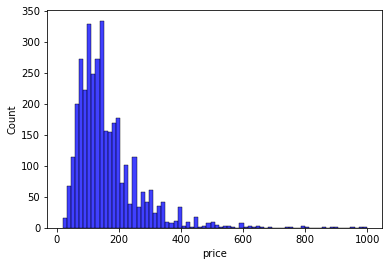

In [15]:
sns.histplot(x='price', data= df, color='blue' )

In [16]:
df=df[df['price']>20]
df=df[df['price']<600]


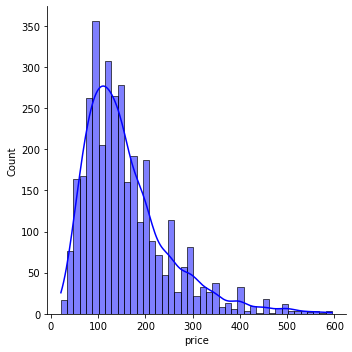

In [17]:
sns.displot(x='price',kde=True, data=df, color='blue')

In de boxplot kan worden waargenomendat er veel hoge uitschieters zijn als het gaat om het minimum aantal nachten dat een gast moet blijven in een airbnb. Zulke hoge aantallen is onwaarschijnlijk en worden daarom ook uit de dataset verwijderd.

<AxesSubplot:xlabel='minimum_nights'>

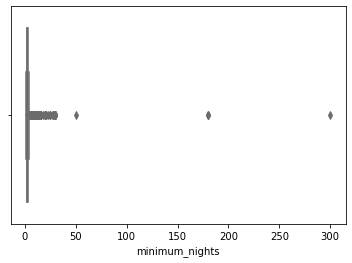

In [18]:
sns.boxplot(x='minimum_nights', data= df, color= 'hotpink')

<AxesSubplot:xlabel='minimum_nights'>

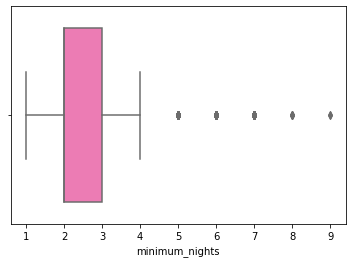

In [19]:
df=df[df['minimum_nights']<10]
sns.boxplot(x='minimum_nights', data= df, color='hotpink')

Er zijn Airbnb in Amsterdam die momenteel 0 dagen in het jaar beschikbaar zijn. We weten hier niet de reden van, maar om de betrouwbaarheid te waarborgen worden deze airbnb's uit de dataset verwijderd. Op deze manier zitten er alleen nog accomendaties in die minimaal 1 nacht in het jaar beschikbaar zijn.  

<AxesSubplot:xlabel='availability_365'>

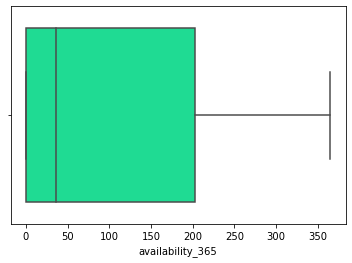

In [20]:
sns.boxplot(x='availability_365', data=df, color='mediumspringgreen')

In [21]:
df=df[df['availability_365']>0]

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

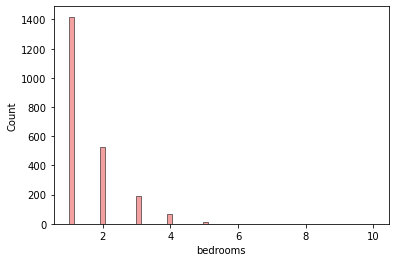

In [22]:
sns.histplot(x='bedrooms', data=df, color='lightcoral')

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

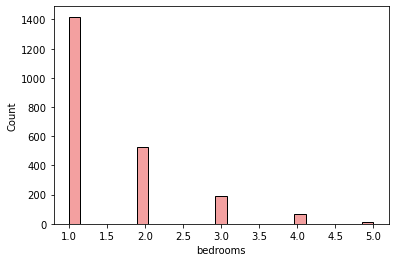

In [23]:
df=df[df['bedrooms']<6]
sns.histplot(x='bedrooms', data=df, color='lightcoral')

<AxesSubplot:xlabel='accommodates'>

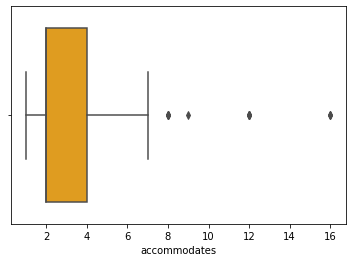

In [24]:
sns.boxplot(x='accommodates', data= df, color= 'orange')

<AxesSubplot:xlabel='accommodates', ylabel='Count'>

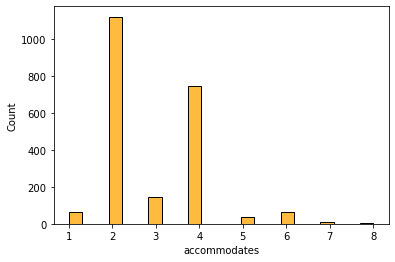

In [25]:
df=df[df['accommodates']<=8]
sns.histplot(x='accommodates', data= df, color= 'orange')

###  Variabelen

uitleg

In [26]:
df.corr()

,host_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
host_listings_count,1.000000,-0.029816,-0.061982,-0.002375,-0.071492,-0.025324,0.086597,0.151930,0.020561,-0.126338,0.439927,0.018934
accommodates,-0.029816,1.000000,0.718773,0.772256,0.561227,0.210152,-0.032281,-0.075262,-0.178487,-0.035486,-0.046677,-0.113026
bedrooms,-0.061982,0.718773,1.000000,0.743548,0.570776,0.285212,-0.065378,-0.196015,-0.225447,0.023006,-0.124578,-0.169350
beds,-0.002375,0.772256,0.743548,1.000000,0.460874,0.190531,-0.018108,-0.059463,-0.137892,-0.060753,0.006534,-0.097767
price,-0.071492,0.561227,0.570776,0.460874,1.000000,0.201885,-0.027963,-0.059843,-0.295145,0.119274,-0.118895,-0.233413
minimum_nights,-0.025324,0.210152,0.285212,0.190531,0.201885,1.000000,-0.162100,-0.190614,-0.179697,-0.005106,-0.070284,-0.202924
maximum_nights,0.086597,-0.032281,-0.065378,-0.018108,-0.027963,-0.162100,1.000000,0.092045,-0.013944,-0.049305,0.160111,0.005553
availability_365,0.151930,-0.075262,-0.196015,-0.059463,-0.059843,-0.190614,0.092045,1.000000,0.145064,-0.175133,0.333766,0.173024
number_of_reviews,0.020561,-0.178487,-0.225447,-0.137892,-0.295145,-0.179697,-0.013944,0.145064,1.000000,-0.005914,-0.068966,0.568968
review_scores_rating,-0.126338,-0.035486,0.023006,-0.060753,0.119274,-0.005106,-0.049305,-0.175133,-0.005914,1.000000,-0.231467,-0.037006


In [27]:
corr= df.corr()
corr['price'].sort_values(ascending=False)

price                             1.000000
bedrooms                          0.570776
accommodates                      0.561227
beds                              0.460874
minimum_nights                    0.201885
review_scores_rating              0.119274
maximum_nights                   -0.027963
availability_365                 -0.059843
host_listings_count              -0.071492
calculated_host_listings_count   -0.118895
reviews_per_month                -0.233413
number_of_reviews                -0.295145
Name: price, dtype: float64

Om tot de beste analyse te komen worden corrolaties lager dan 0.1 verwijderd uit de dataset.

In [28]:
df=df.drop(columns=['maximum_nights', 'availability_365', 'host_listings_count', 'host_since', 'amenities'])


In [29]:
corr_2= df.corr()
corr_2['price'].sort_values(ascending=False)

price                             1.000000
bedrooms                          0.570776
accommodates                      0.561227
beds                              0.460874
minimum_nights                    0.201885
review_scores_rating              0.119274
calculated_host_listings_count   -0.118895
reviews_per_month                -0.233413
number_of_reviews                -0.295145
Name: price, dtype: float64

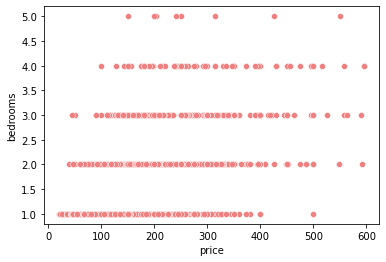

In [30]:
Scatterplot = sns.scatterplot(x= "price", y="bedrooms", data=df, color='lightcoral')
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.show()

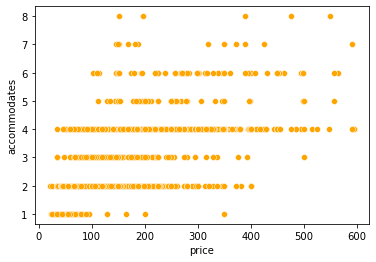

In [31]:
Scatterplot = sns.scatterplot(x= "price", y="accommodates", data=df, color='orange')
plt.xlabel("price")
plt.ylabel("accommodates")
plt.show()

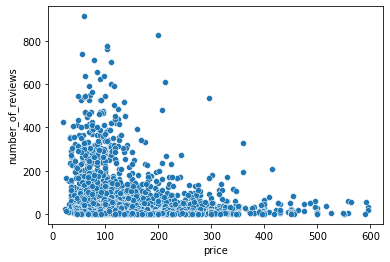

In [32]:
Scatterplot = sns.scatterplot(x= "price", y="number_of_reviews", data=df)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

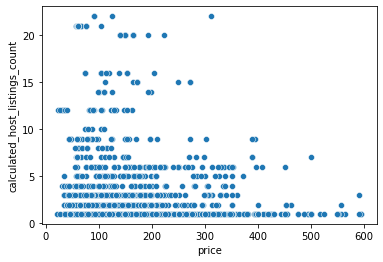

In [33]:
Scatterplot = sns.scatterplot(x= "price", y="calculated_host_listings_count", data=df)
plt.xlabel("price")
plt.ylabel("calculated_host_listings_count")
plt.show()

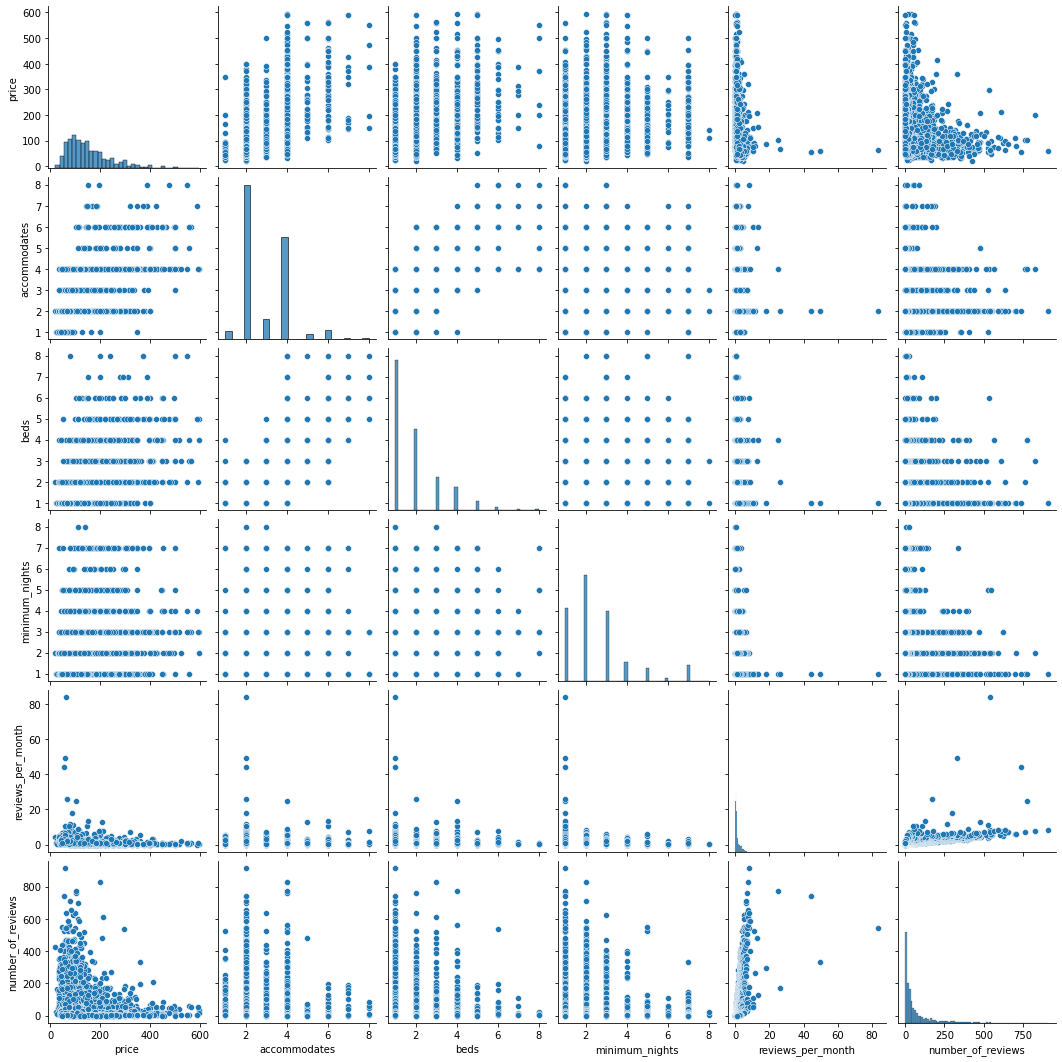

In [34]:
sns.pairplot(df[['price', 'accommodates', 'beds', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']])
plt.show()

### dummies maken van de overige data

In [35]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 5586
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               2198 non-null   object 
 1   neighbourhood                   2198 non-null   object 
 2   room_type                       2198 non-null   object 
 3   accommodates                    2198 non-null   int64  
 4   bathrooms_text                  2198 non-null   object 
 5   bedrooms                        2198 non-null   float64
 6   beds                            2198 non-null   float64
 7   price                           2198 non-null   float64
 8   minimum_nights                  2198 non-null   int64  
 9   number_of_reviews               2198 non-null   int64  
 10  review_scores_rating            2198 non-null   float64
 11  instant_bookable                2198 non-null   object 
 12  calculated_host_listings_count  21

,host_is_superhost,neighbourhood,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,t,"Amsterdam, North Holland, Netherlands",Private room,2,1.5 shared baths,1.0,2.0,59.0,3,285,4.89,t,1,1.83
3,t,"Amsterdam, North Holland, Netherlands",Private room,2,1 shared bath,1.0,1.0,75.0,2,372,4.88,f,2,2.69
4,t,"Amsterdam, North Holland, Netherlands",Private room,1,1 shared bath,1.0,1.0,55.0,2,525,4.78,f,2,3.99
6,t,"Amsterdam, North Holland, Netherlands",Entire home/apt,3,1 bath,2.0,2.0,160.0,3,394,4.91,f,1,2.89
10,f,"Amsterdam, North Holland, Netherlands",Entire home/apt,3,1.5 baths,1.0,1.0,150.0,5,62,4.95,f,1,0.46


In [36]:
df=pd.get_dummies(df,columns=['host_is_superhost', 'neighbourhood', 'room_type', 'bathrooms_text', 'instant_bookable'])
df.head()

,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_is_superhost_f,...,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_3 baths,bathrooms_text_3.5 baths,bathrooms_text_4.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,instant_bookable_f,instant_bookable_t
0,2,1.0,2.0,59.0,3,285,4.89,1,1.83,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1.0,1.0,75.0,2,372,4.88,2,2.69,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1.0,1.0,55.0,2,525,4.78,2,3.99,0,...,0,0,0,0,0,0,0,0,1,0
6,3,2.0,2.0,160.0,3,394,4.91,1,2.89,0,...,0,0,0,0,0,0,0,0,1,0
10,3,1.0,1.0,150.0,5,62,4.95,1,0.46,1,...,0,0,0,0,0,0,0,0,1,0


### Het model - Linear Regression

Voor lineare regressie zal eerst de data op gesplits moeten worden in 2 variaberlen X & Y. In dit geval is de Y de prijs, die aan de hand van de x variabeleen voorspeld kan gaan  worden. 

De volgende stap is om de forumele te trainen met een train dataset. We controleren vervolgens of de voorspelling accuraat is aan de hand van de test dataset. We splitsen de data set dus in een train- en test dataset, dit doen we aan de hand van een 70% vs 30% verhouding.

In [37]:
df.head()

,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_is_superhost_f,...,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_3 baths,bathrooms_text_3.5 baths,bathrooms_text_4.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,instant_bookable_f,instant_bookable_t
0,2,1.0,2.0,59.0,3,285,4.89,1,1.83,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1.0,1.0,75.0,2,372,4.88,2,2.69,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1.0,1.0,55.0,2,525,4.78,2,3.99,0,...,0,0,0,0,0,0,0,0,1,0
6,3,2.0,2.0,160.0,3,394,4.91,1,2.89,0,...,0,0,0,0,0,0,0,0,1,0
10,3,1.0,1.0,150.0,5,62,4.95,1,0.46,1,...,0,0,0,0,0,0,0,0,1,0


In [38]:
y=df['price']
x=df.loc[:, ~df.columns.isin(['price'])]
x.head()

,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_is_superhost_f,host_is_superhost_t,...,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_3 baths,bathrooms_text_3.5 baths,bathrooms_text_4.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,instant_bookable_f,instant_bookable_t
0,2,1.0,2.0,3,285,4.89,1,1.83,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2,1.0,1.0,2,372,4.88,2,2.69,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1.0,1.0,2,525,4.78,2,3.99,0,1,...,0,0,0,0,0,0,0,0,1,0
6,3,2.0,2.0,3,394,4.91,1,2.89,0,1,...,0,0,0,0,0,0,0,0,1,0
10,3,1.0,1.0,5,62,4.95,1,0.46,1,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 56)
x_train.head()

,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_is_superhost_f,host_is_superhost_t,...,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_3 baths,bathrooms_text_3.5 baths,bathrooms_text_4.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,instant_bookable_f,instant_bookable_t
3148,4,1.0,2.0,1,48,4.65,6,1.28,1,0,...,0,0,0,0,0,0,0,0,0,1
2580,2,1.0,1.0,6,110,4.69,1,2.33,1,0,...,0,0,0,0,0,0,0,0,0,1
2987,4,4.0,4.0,3,8,5.00,1,0.19,1,0,...,0,0,0,0,0,0,0,0,1,0
3639,4,2.0,2.0,3,8,4.88,1,0.26,1,0,...,0,0,0,0,0,0,0,0,1,0
1771,2,1.0,2.0,1,226,4.93,1,3.52,0,1,...,0,0,0,0,0,0,0,0,1,0


In [40]:
lm=LinearRegression()
lm=lm.fit(x_train, y_train)
lm.intercept_

-10.933613814105627

In [41]:
pd.DataFrame(x.columns, lm.coef_)

,0
19.233690,accommodates
19.663456,bedrooms
-1.342865,beds
-4.670566,minimum_nights
-0.067282,number_of_reviews
...,...
162.445072,bathrooms_text_Half-bath
-27.157231,bathrooms_text_Private half-bath
-5.082514,bathrooms_text_Shared half-bath
1.133831,instant_bookable_f


De formule die hoort bij de lineare regressie volgt hieronder:
Price=-30.30 + 18.28*accommodates + 24.85*bedrooms + 0.5*beds - 0.06*number_of_reviews - 3.5*minimum_nights + 169.64*bathrooms_text_Half-bath - 41.37*bathrooms_text_Private half-bath - 4.95*bathrooms_text_Shared half-bath - 2.66*instant_bookable_f - 2.66*instant_bookable_t,   enzovoorts

In [42]:
y_test_p=lm.predict(x_test)
r2_score(y_test, y_test_p)

0.4889990297239406

hoeveel procent de formule correct voorspeld

In [43]:
math.sqrt(mean_squared_error(y_test, y_test_p))

65.93635882949285

Gemiddeld zit de formule 65.94 naast de exacte prijs

In [44]:
df_y=pd.DataFrame(y_test)
df_y['price_p']= lm.predict(x_test)
df_test=pd.concat([df_y,x_test[['accommodates','bedrooms','beds', 'number_of_reviews', 'reviews_per_month']]],axis=1)
df_test.head(100)

,price,price_p,accommodates,bedrooms,beds,number_of_reviews,reviews_per_month
1767,110.0,88.977631,2,1.0,1.0,77,1.25
2004,100.0,216.271288,4,3.0,2.0,7,0.12
3543,75.0,92.051769,2,1.0,1.0,37,1.14
4247,221.0,211.482429,4,2.0,3.0,1,0.06
3334,161.0,91.727400,2,1.0,1.0,8,0.24
...,...,...,...,...,...,...,...
2839,80.0,100.656819,2,1.0,1.0,80,1.98
352,100.0,160.750922,2,1.0,1.0,42,0.42
3627,373.0,169.064194,2,1.0,2.0,4,0.13
4519,163.0,170.114550,2,1.0,1.0,3,0.48


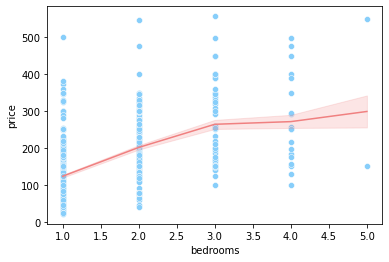

In [45]:
sns.scatterplot(x="bedrooms", y="price", data=df_test, color='lightskyblue')
sns.lineplot(x="bedrooms", y="price_p", data=df_test,color='lightcoral')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

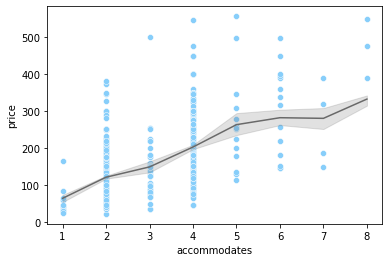

In [46]:
sns.scatterplot(x="accommodates", y="price", data=df_test, color='lightskyblue')
sns.lineplot(x="accommodates", y="price_p", data=df_test,color='dimgray')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

### Poly regression

In [ ]:
poly=PolynomialFeatures(degree = 3)
x_poly=poly.fit_transform(x_train)
poly.fit(x_poly, y_train)

pl=LinearRegression()
pl.fit(x_poly, y_train)

nieuwe dataset maken met de nieuw voorspelde prijzen.

In [ ]:
df_y=pd.DataFrame(y_test)
df_y['price_voorspeld']= pl.predict(poly.fit_transform(x_test))
df_test=pd.concat([df_y,x_test[['bedrooms']]],axis=1)
df_test.head(10)

In [ ]:
sns.scatterplot(x="bedrooms", y="price", data=df_test)
sns.lineplot(x="bedrooms", y="price_voorspeld", data=df_test,color='red')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

In [ ]:
y_test_p =  pl.predict(poly.fit_transform(x_test))
r2_score(y_test, y_test_p)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_test_p))

In [ ]:
sns.scatterplot(x=y_test, y=y_test_p)
plt.xlabel('price')
plt.ylabel('prices voorspeld')
plt.plot([0,600], [0, 500],color='red', lw=1)
plt.show()

In [ ]:
e=y_test_p-y_test
sns.scatterplot(x=y_test, y=e)
plt.xlabel('Prices')
plt.ylabel('Residual')
plt.show()